In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
df.duplicated().sum()

763

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Checking Data types

In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
df.shape

(3577, 8)

In [8]:
cols=df.columns
cols

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [10]:
a =  df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.25,0.5,0.75,0.80,0.85,0.90,0.95,0.97,0.98,0.99]).T
a

,count,mean,std,min,1%,2%,3%,25%,50%,75%,80%,85%,90%,95%,97%,98%,99%,max
year,3577.0,2012.962538,4.251759,1992.0,2000.00,2003.0,2004.0,2010.0,2013.0,2016.0,2017.0,2017.0,2018.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,51786.64,60000.0,70000.0,200000.0,350000.0,600000.0,650000.0,750000.0,875000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,1744.08,5000.0,6525.2,36000.0,60000.0,90000.0,100000.0,110000.0,120000.0,149534.8,170000.0,193440.0,223158.4,806599.0


In [11]:
df = df[(df['selling_price'] > 0) & (df['km_driven'] > 0)]
print(df.describe())

              year  selling_price      km_driven
count  3577.000000   3.577000e+03    3577.000000
mean   2012.962538   4.739125e+05   69250.545709
std       4.251759   5.093018e+05   47579.940016
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   36000.000000
50%    2013.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [12]:
print('Year : ',df.year.unique(),'\n')
print('fuel :', df.fuel.unique(), '\n')
print('Transmission : ', df.transmission.unique(), '\n')
print('seller Type: :', df.seller_type.unique(),'\n')
print('Owner :', df.owner.unique(), '\n')

Year :  [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992] 

fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'] 

Transmission :  ['Manual' 'Automatic'] 

seller Type: : ['Individual' 'Dealer' 'Trustmark Dealer'] 

Owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] 



In [13]:
df['brand']=df['name'].str.split(expand=True)[0]
df['model']=df['name'].str.split(expand=True)[1]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [15]:
df['fuel_type'] = lb.fit_transform(df['fuel'])
df['Type_of_Seller'] = lb.fit_transform(df['seller_type'])
df['Transmit'] = lb.fit_transform(df['transmission'])
df['Owner_Type'] = lb.fit_transform(df['owner'])
df['brand_name'] = lb.fit_transform(df['brand'])
df['model_name'] = lb.fit_transform(df['model'])

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,4,1,1,0,18,6
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,4,1,1,0,18,164
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1,1,1,0,10,161
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,4,1,1,0,5,125
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,1,1,1,2,9,17


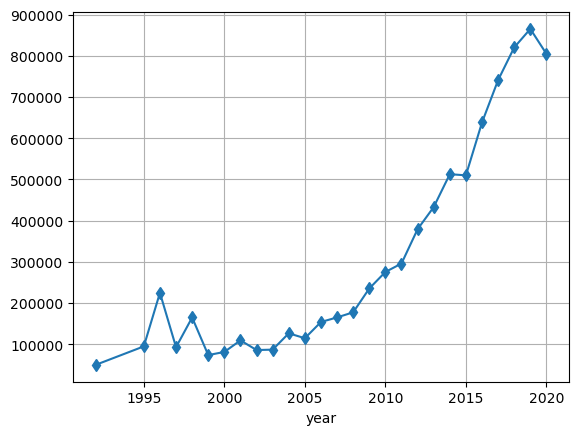

In [17]:
r1=df.groupby('year')['selling_price'].mean()
r1.plot(kind='line',marker='d')
plt.grid()
plt.show()

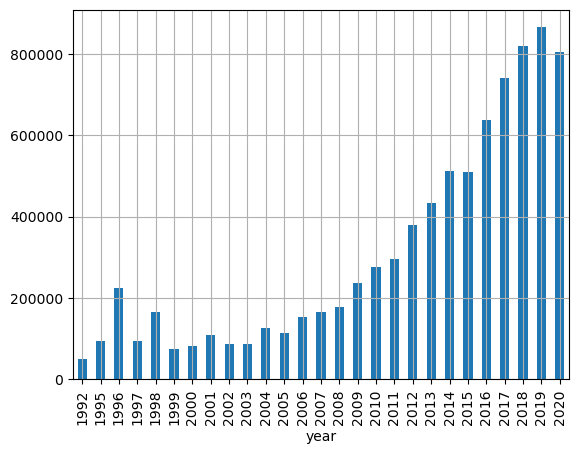

In [18]:
r1.plot(kind='bar')
plt.grid()
plt.show()

In [19]:
r2=df.groupby('brand')['selling_price'].mean()

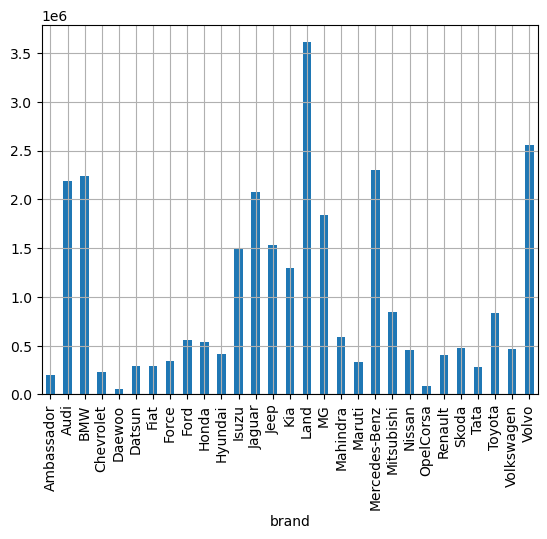

In [20]:
r2.plot(kind='bar')
plt.grid()
plt.show()

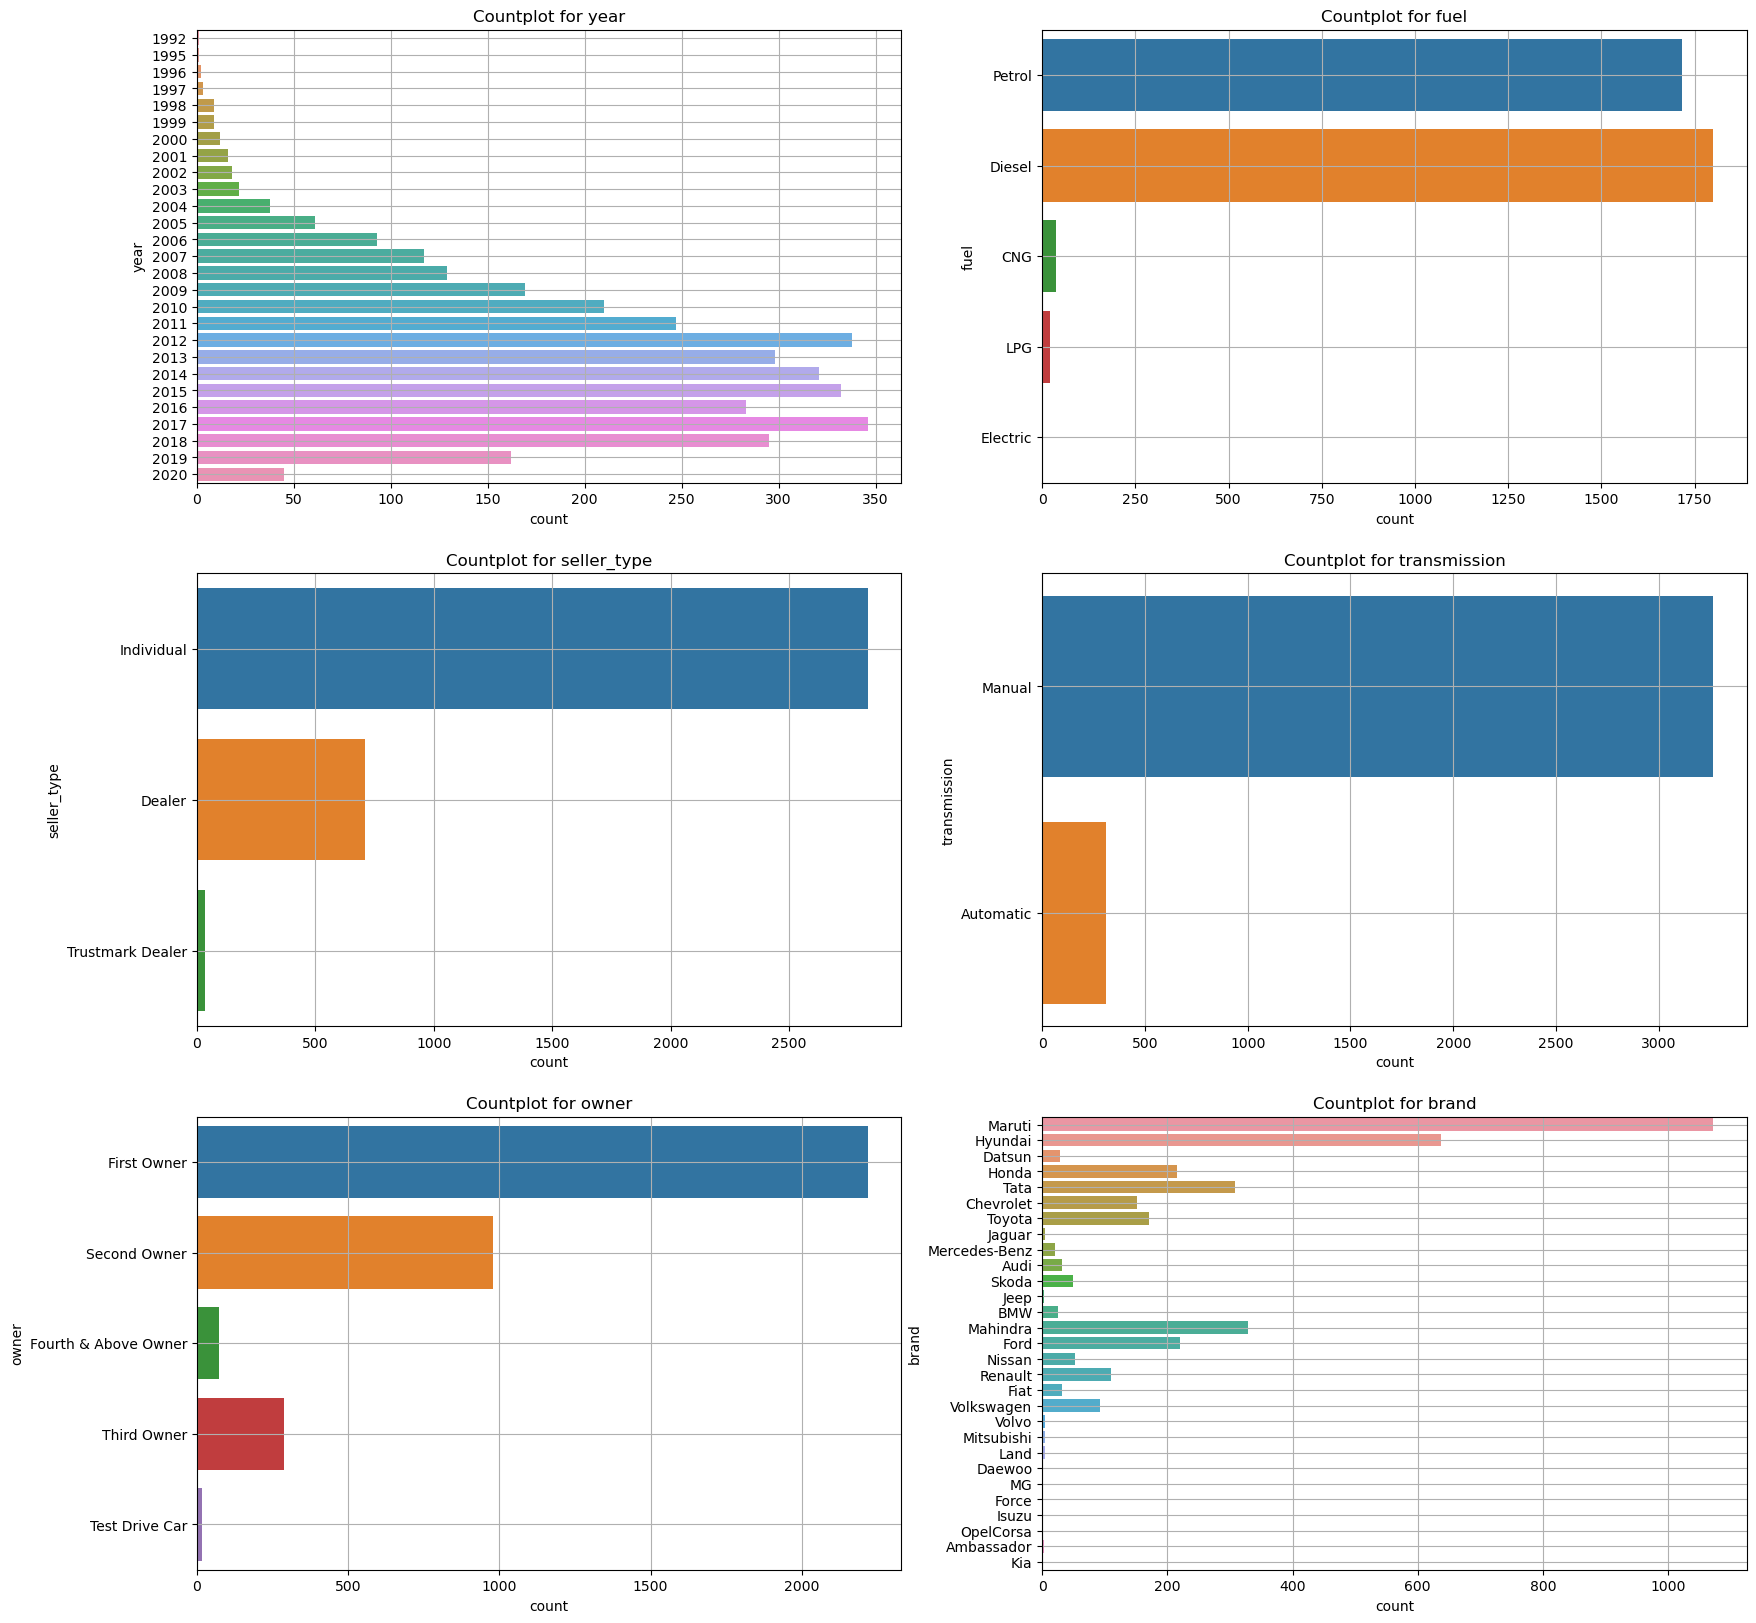

In [21]:
cols = ['year','fuel', 'seller_type',
       'transmission', 'owner', 'brand']

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
    plt.grid()

plt.show()

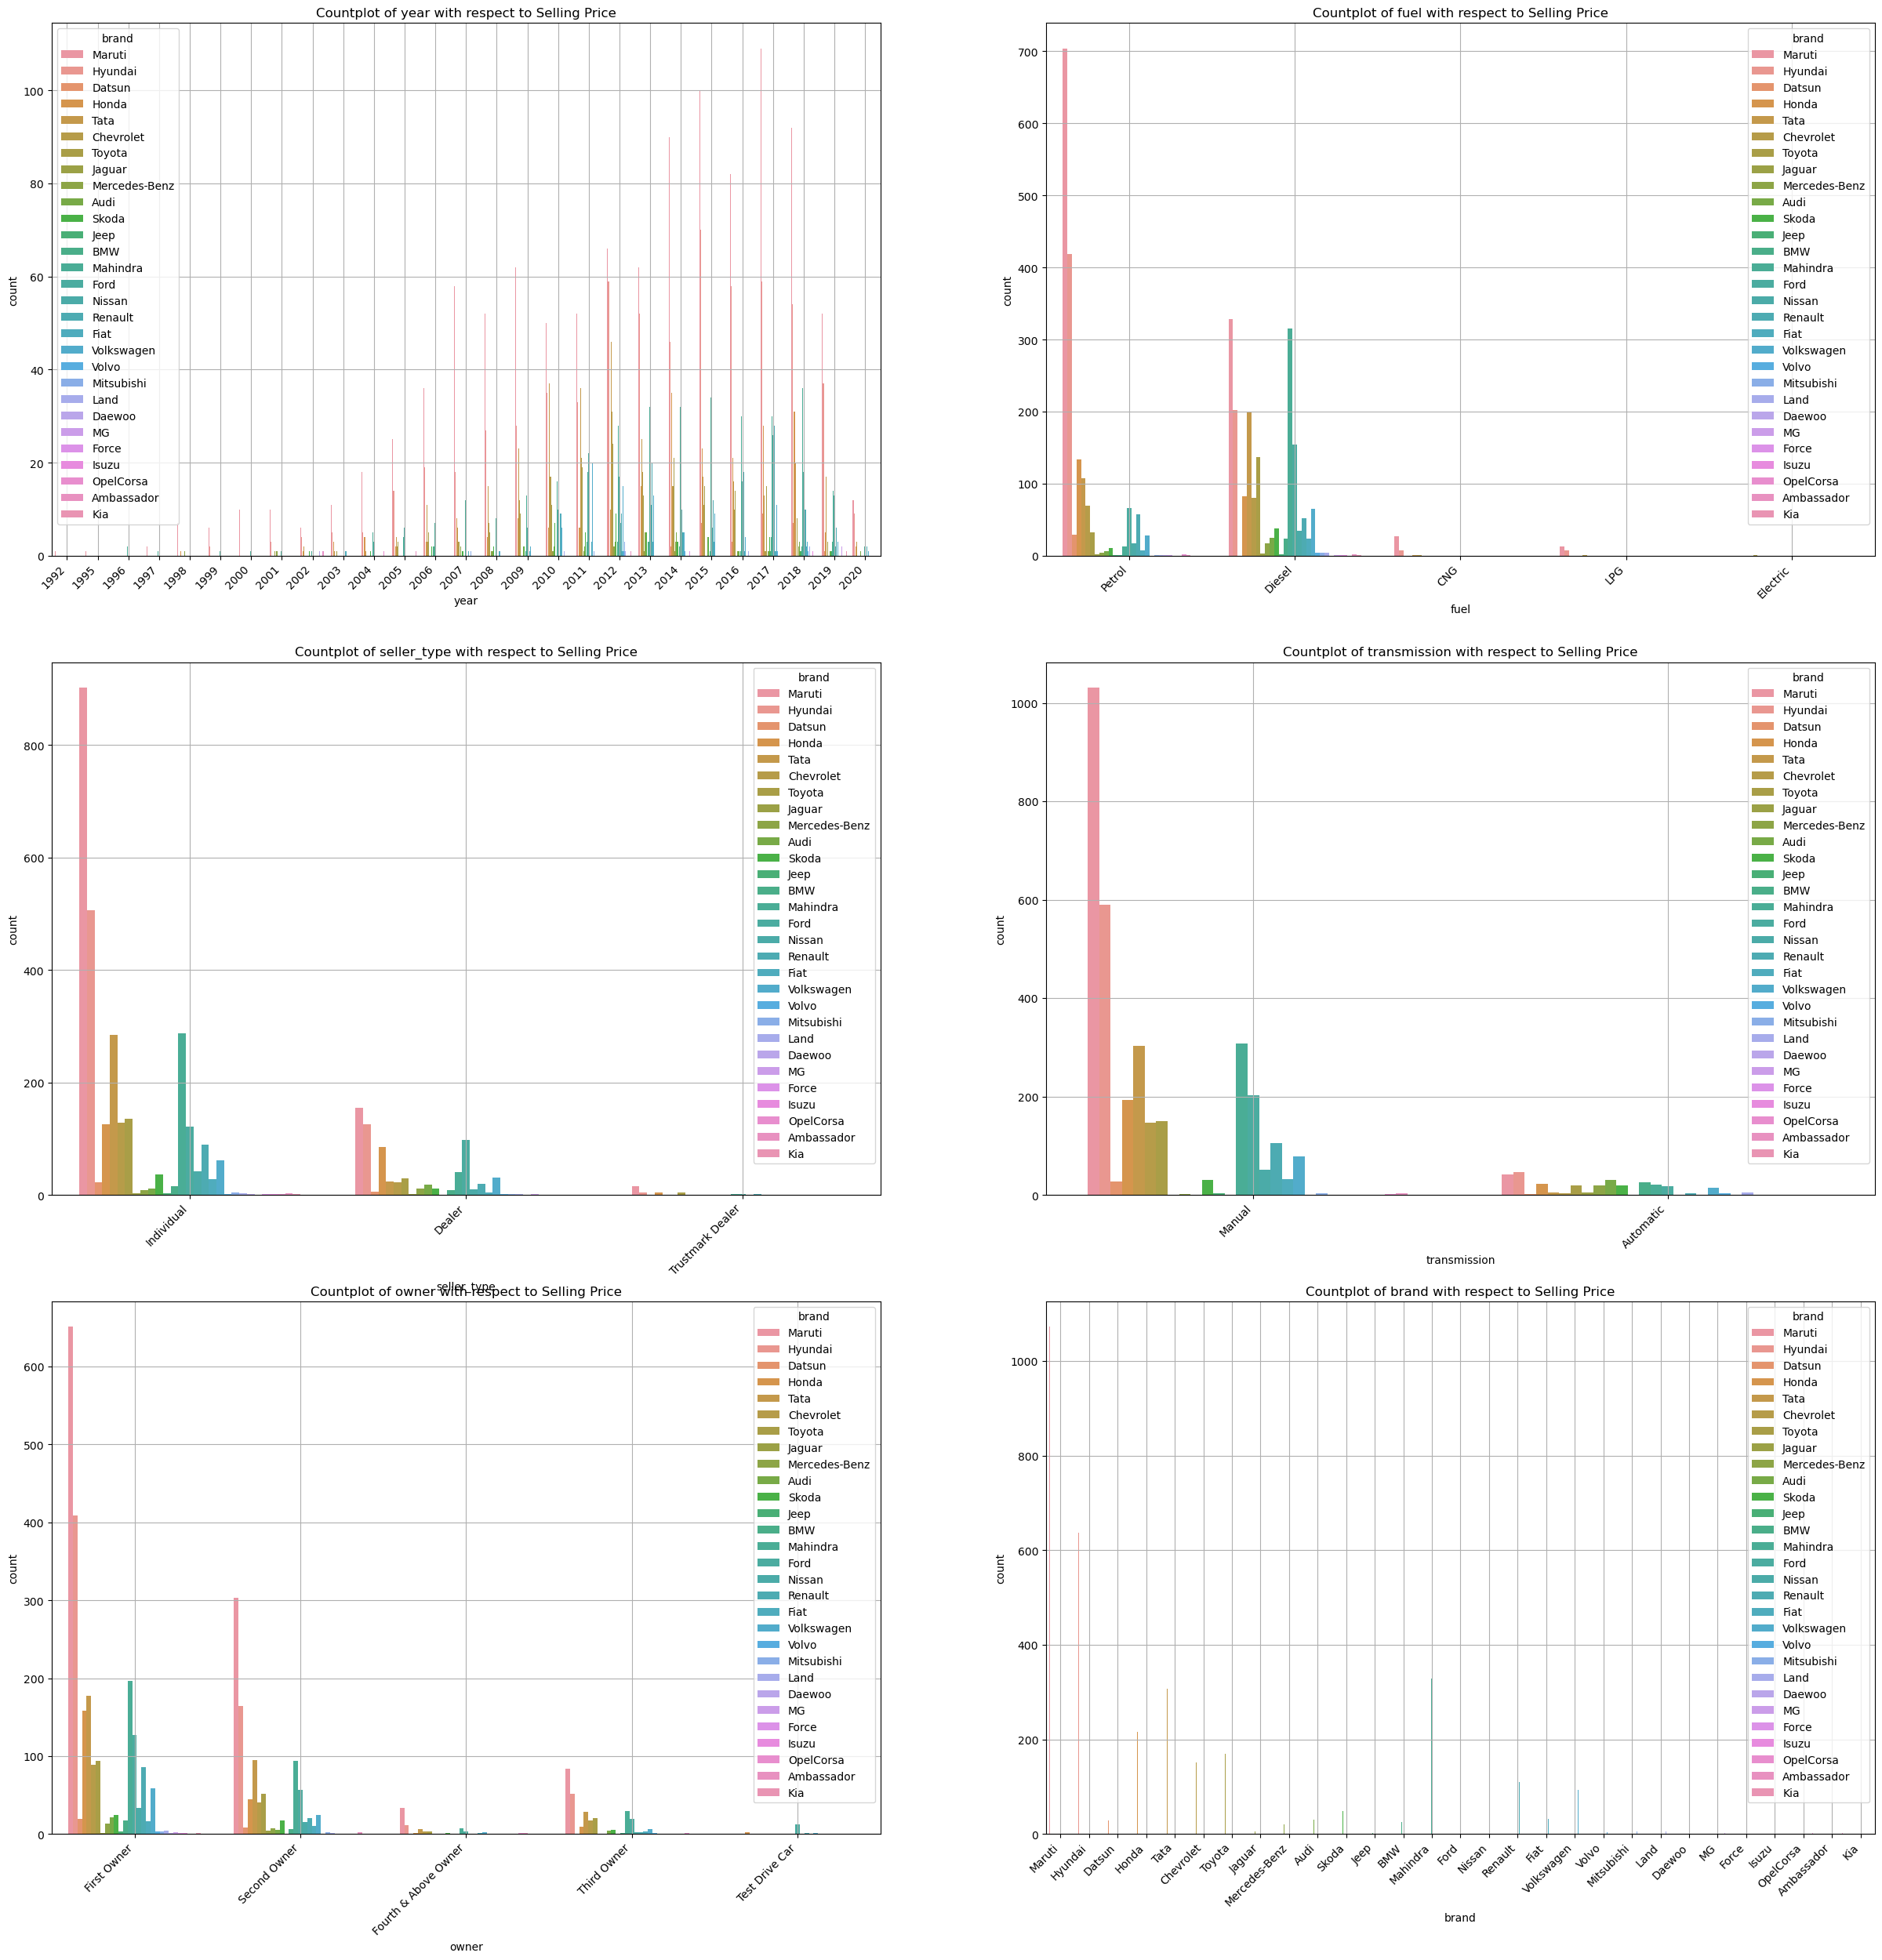

In [22]:
cols=['year','fuel','seller_type','transmission','owner','brand']
plt.figure(figsize=(30,30))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['brand'])
    plt.title(f'Countplot of {cols[i]} with respect to Selling Price')
    plt.xticks(rotation=45, ha='right')
    plt.grid()
plt.show()

In [23]:
d1 = df.groupby(df['fuel'])['selling_price'].mean()
d1

fuel
CNG         273162.081081
Diesel      614001.075000
Electric    310000.000000
LPG         171818.136364
Petrol      335344.340128
Name: selling_price, dtype: float64

In [24]:
df['selling_price'].mean()

473912.54207436397

In [25]:
d2 = d1.isin(d1 > df['selling_price'].mean())
d2

fuel
CNG         False
Diesel      False
Electric    False
LPG         False
Petrol      False
Name: selling_price, dtype: bool

In [26]:
d3 = df.groupby(df['seller_type'])['selling_price'].mean()
d3

seller_type
Dealer              652699.390449
Individual          424904.024364
Trustmark Dealer    822272.727273
Name: selling_price, dtype: float64

In [27]:
d4 = d1.isin(d3>df['selling_price'].mean())
d4

fuel
CNG         False
Diesel      False
Electric    False
LPG         False
Petrol      False
Name: selling_price, dtype: bool

In [28]:
c1 = df.groupby(df['transmission'])['selling_price'].mean()
c1

transmission
Automatic    1.274955e+06
Manual       3.973657e+05
Name: selling_price, dtype: float64

In [29]:
c4=c1.isin(c1>df['selling_price'].mean())
c4

transmission
Automatic    False
Manual       False
Name: selling_price, dtype: bool

In [59]:
data = df.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand','model'], axis=1)
data.head()

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
0,2007,60000,70000,4,1,1,0,18,6
1,2007,135000,50000,4,1,1,0,18,164
2,2012,600000,100000,1,1,1,0,10,161
3,2017,250000,46000,4,1,1,0,5,125
4,2014,450000,141000,1,1,1,2,9,17


In [60]:
data.to_csv('ds_for_ml.csv')

In [31]:
data.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel_type         int32
Type_of_Seller    int32
Transmit          int32
Owner_Type        int32
brand_name        int32
model_name        int32
dtype: object

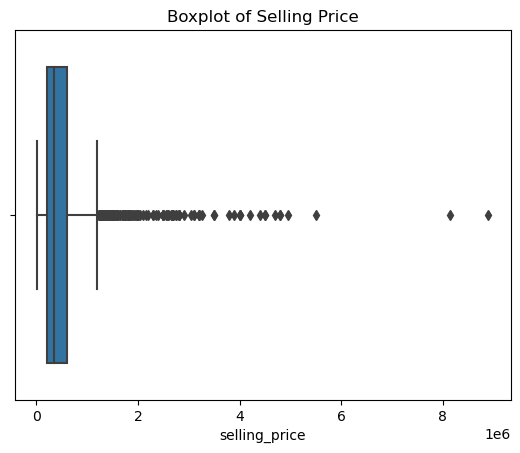

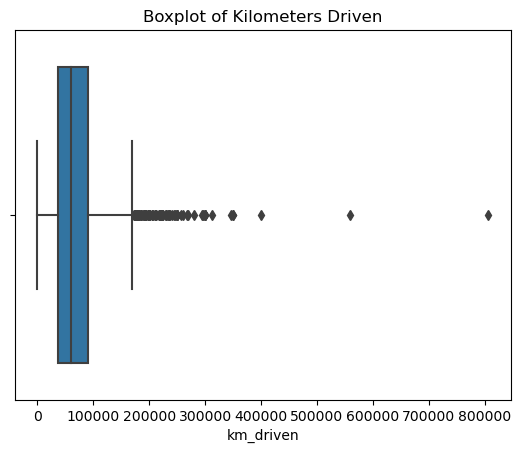

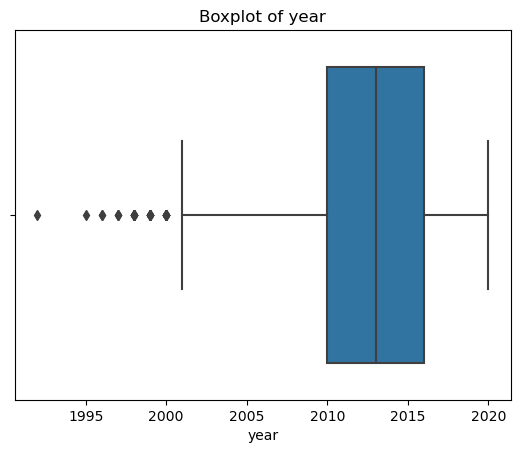

In [32]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')

plt.show()

In [33]:
def treatment_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [34]:
for i in num_cols:
    data = treatment_outliers(data, i)

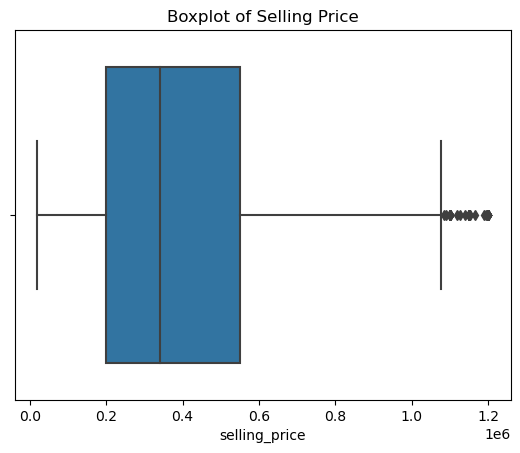

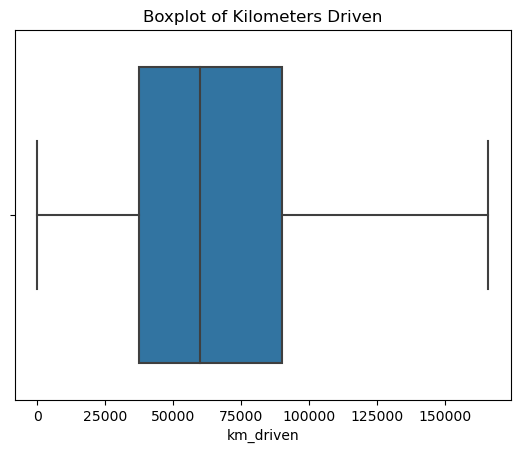

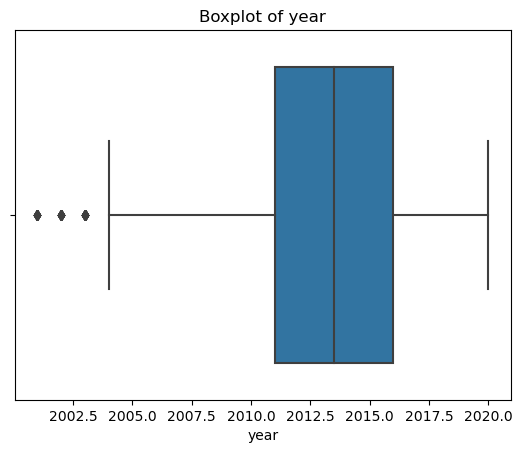

In [35]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = data.drop(columns=['selling_price'])
y = data['selling_price']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2600, 8)
(2600,)
(650, 8)
(650,)


In [39]:
from sklearn.metrics import *

In [40]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'MAE':mae,
                       'MSE':mse,'RMSE':rmse},index=[mname])
    return res,ypred

In [41]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from xgboost import XGBRegressor

In [42]:
lr = LinearRegression()
lr_res,ypred_lr = eval_model(lr,'LinReg')
lr_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.516628,0.530195,132100.592449,3.114462e+10,176478.388762


In [43]:
dt = DecisionTreeRegressor(max_depth=6,min_samples_split=8)
dt_res,ypred_dt = eval_model(dt,'DT_Reg')
dt_res

,Train_R2,Test_R2,MAE,MSE,RMSE
DT_Reg,0.688303,0.641265,111228.575154,2.378150e+10,154212.51036


In [44]:
knn = KNeighborsRegressor(n_neighbors=11)
knn_res,ypred_knn = eval_model(knn,'KNN_Reg')
knn_res

,Train_R2,Test_R2,MAE,MSE,RMSE
KNN_Reg,0.310142,0.233421,174481.600979,5.081855e+10,225429.693327


In [45]:
rf = RandomForestRegressor(n_estimators=80,max_depth=6,min_samples_split=8)
rf_res,ypred_rf = eval_model(rf,'RF_Reg')
rf_res

,Train_R2,Test_R2,MAE,MSE,RMSE
RF_Reg,0.722264,0.688626,104684.381534,2.064180e+10,143672.536745


In [46]:
rg = Ridge()
rg_res,y_pred_rg = eval_model(rg,'Ridge_reg')
rg_res

,Train_R2,Test_R2,MAE,MSE,RMSE
Ridge_reg,0.516626,0.530158,132107.951228,3.114709e+10,176485.380828


In [47]:
ls = Lasso()
ls_res,y_pred_rg = eval_model(ls,'Lasso_reg')
ls_res

,Train_R2,Test_R2,MAE,MSE,RMSE
Lasso_reg,0.516628,0.530194,132100.673656,3.114466e+10,176478.491726


In [48]:
all_res  = pd.concat([lr_res,dt_res,knn_res,rf_res,rg_res,ls_res])
all_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.516628,0.530195,132100.592449,3.114462e+10,176478.388762
DT_Reg,0.688303,0.641265,111228.575154,2.378150e+10,154212.510360
KNN_Reg,0.310142,0.233421,174481.600979,5.081855e+10,225429.693327
RF_Reg,0.722264,0.688626,104684.381534,2.064180e+10,143672.536745
Ridge_reg,0.516626,0.530158,132107.951228,3.114709e+10,176485.380828
Lasso_reg,0.516628,0.530194,132100.673656,3.114466e+10,176478.491726


In [49]:
import pickle
import joblib

In [50]:
pickle.dump(rf,open('Best_Model_1.pkl','wb'))
pickle.dump(dt,open('Best_model_2.pkl','wb'))

In [51]:
load_model=joblib.load('Best_Model_1.pkl')

In [52]:
random_indices = np.random.choice(data.index, size= 20, replace=False)
sample_data_20 = data.loc[random_indices]
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
2145,2017,575000,80000,1,1,1,0,27,18
646,2011,425000,50000,1,1,1,0,17,138
3376,2013,525000,71000,1,0,1,0,10,161
1449,2012,580000,70000,1,1,1,0,17,174
3944,2014,225000,30000,4,1,1,0,10,50
1118,2016,500000,40000,4,1,1,0,10,183
1233,2013,425000,66000,4,1,1,0,10,161
570,2017,600000,46507,1,2,1,0,18,147
4213,2015,550000,135000,1,1,1,2,8,52
1192,2014,204999,25000,4,1,1,2,18,14


In [53]:
sample_data=sample_data_20.drop('selling_price', axis=1)

In [54]:
Sample_pred = load_model.predict(sample_data)
Sample_pred

array([720266.88360166, 294863.7934091 , 430644.81028696, 418507.29840913,
       348905.20244581, 448710.63005897, 317952.75442408, 674676.74049214,
       537319.39399171, 228855.55555964, 398018.14266854, 601137.19347395,
       367325.86062345, 170499.780331  , 569816.97603273, 179894.23406523,
       208931.88794675, 763562.5921023 , 146722.71771746, 314192.56020998])

In [55]:
Prediction_sample = pd.DataFrame(Sample_pred)
Prediction_sample


,0
0,720266.883602
1,294863.793409
2,430644.810287
3,418507.298409
4,348905.202446
5,448710.630059
6,317952.754424
7,674676.740492
8,537319.393992
9,228855.555560


In [56]:
print(sample_data_20[['selling_price', 'year']])

      selling_price  year
2145         575000  2017
646          425000  2011
3376         525000  2013
1449         580000  2012
3944         225000  2014
1118         500000  2016
1233         425000  2013
570          600000  2017
4213         550000  2015
1192         204999  2014
1869         360000  2016
1475         750000  2016
795          300000  2013
4329         160000  2010
2026         381000  2016
3666          85000  2010
1859         260000  2012
3728         980000  2018
64            70000  2005
3524         350000  2017


In [57]:
sample_data_20['pred_selling_price']=Prediction_sample.values
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name,pred_selling_price
2145,2017,575000,80000,1,1,1,0,27,18,720266.883602
646,2011,425000,50000,1,1,1,0,17,138,294863.793409
3376,2013,525000,71000,1,0,1,0,10,161,430644.810287
1449,2012,580000,70000,1,1,1,0,17,174,418507.298409
3944,2014,225000,30000,4,1,1,0,10,50,348905.202446
1118,2016,500000,40000,4,1,1,0,10,183,448710.630059
1233,2013,425000,66000,4,1,1,0,10,161,317952.754424
570,2017,600000,46507,1,2,1,0,18,147,674676.740492
4213,2015,550000,135000,1,1,1,2,8,52,537319.393992
1192,2014,204999,25000,4,1,1,2,18,14,228855.555560


In [58]:
com = (sample_data_20[['selling_price', 'pred_selling_price']])
com.to_csv('sample_prediction.csv')
com

,selling_price,pred_selling_price
2145,575000,720266.883602
646,425000,294863.793409
3376,525000,430644.810287
1449,580000,418507.298409
3944,225000,348905.202446
1118,500000,448710.630059
1233,425000,317952.754424
570,600000,674676.740492
4213,550000,537319.393992
1192,204999,228855.555560
